# Questions

+ Which of the two train stations next to my apartment is more popular?
+ What are the most popular stations overall (and least popular)?
+ What part of the city has the most ridership?
+ Are there any interesting trends in ridership I can see over time?

In [21]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
L_Rides = pd.read_csv('data/CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals.csv')
L_Rides.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,01/01/2001,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,01/01/2001,1489.1,1054.0,718.0,40567
2,40100,Morse,01/01/2001,4412.5,3064.5,2087.8,119772
3,41300,Loyola,01/01/2001,4664.5,3156.0,1952.8,125008
4,40760,Granville,01/01/2001,3109.8,2126.0,1453.8,84189


In [4]:
L_Rides.describe()

,station_id,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
count,30324.000000,30324.000000,30324.000000,30324.000000,30324.000000
mean,40761.827925,3905.694041,2274.127114,1654.069236,100870.005507
std,446.142712,3346.461777,2297.972923,1795.216272,87640.347367
min,40010.000000,0.000000,0.000000,0.000000,0.000000
25%,40370.000000,1467.975000,817.300000,557.200000,37937.750000
50%,40750.000000,2962.500000,1478.000000,1024.800000,75140.000000
75%,41150.000000,5120.600000,2916.200000,2054.575000,132466.000000
max,41700.000000,24041.400000,19171.300000,15982.000000,670496.000000


## Which of the two train stations next to my apartment is more popular?


In [5]:
L_Rides[L_Rides['stationame'] == 'Berwyn']
L_Rides.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,01/01/2001,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,01/01/2001,1489.1,1054.0,718.0,40567
2,40100,Morse,01/01/2001,4412.5,3064.5,2087.8,119772
3,41300,Loyola,01/01/2001,4664.5,3156.0,1952.8,125008
4,40760,Granville,01/01/2001,3109.8,2126.0,1453.8,84189


In [7]:
L_Rides['date_time'] = pd.to_datetime(L_Rides['month_beginning'])

In [8]:
L_Rides.dtypes

station_id                           int64
stationame                          object
month_beginning                     object
avg_weekday_rides                  float64
avg_saturday_rides                 float64
avg_sunday-holiday_rides           float64
monthtotal                           int64
date_time                   datetime64[ns]
dtype: object

In [10]:
Berwyn_Rides = L_Rides[(L_Rides['stationame'] == 'Berwyn') &
                       (L_Rides['date_time'] >= '01/01/2017') &
                       (L_Rides['date_time'] < '12/31/2017')]
Berwyn_Rides

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,date_time
27382,40340,Berwyn,01/01/2017,3251.1,2558.0,1715.0,88796,2017-01-01
27465,40340,Berwyn,02/01/2017,3383.9,2498.5,1918.3,85345,2017-02-01
27683,40340,Berwyn,03/01/2017,3377.5,2349.5,1798.0,94273,2017-03-01
27833,40340,Berwyn,04/01/2017,3312.9,2489.4,1801.4,87712,2017-04-01
28002,40340,Berwyn,05/01/2017,3301.2,2388.0,1917.2,91764,2017-05-01
28126,40340,Berwyn,06/01/2017,3419.8,2915.3,2486.5,96843,2017-06-01
28199,40340,Berwyn,07/01/2017,3287.0,2663.4,1976.3,90915,2017-07-01
28307,40340,Berwyn,08/01/2017,3307.7,2661.3,2097.5,95112,2017-08-01
28524,40340,Berwyn,09/01/2017,3515.6,2634.4,2042.0,93693,2017-09-01
28720,40340,Berwyn,10/01/2017,3550.3,2773.8,2152.0,99962,2017-10-01


In [11]:
Berwyn_Rides['monthtotal'].sum()

1094141

In [12]:
BrynMawrRides = L_Rides[(L_Rides['stationame'] == 'Bryn Mawr') &
                       (L_Rides['date_time'] >= '01/01/2017') &
                       (L_Rides['date_time'] < '12/31/2017')]
BrynMawrRides

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,date_time
27320,41380,Bryn Mawr,01/01/2017,4437.8,3203.8,2251.8,119519,2017-01-01
27443,41380,Bryn Mawr,02/01/2017,4622.7,3095.0,2438.0,114586,2017-02-01
27663,41380,Bryn Mawr,03/01/2017,4603.7,3067.3,2379.0,127671,2017-03-01
27866,41380,Bryn Mawr,04/01/2017,4620.9,3239.4,2363.6,120433,2017-04-01
27894,41380,Bryn Mawr,05/01/2017,4687.6,3258.8,2554.2,128934,2017-05-01
28016,41380,Bryn Mawr,06/01/2017,4799.7,3688.0,3169.8,133024,2017-06-01
28182,41380,Bryn Mawr,07/01/2017,4662.2,3670.4,2827.3,128559,2017-07-01
28317,41380,Bryn Mawr,08/01/2017,4688.9,3718.8,2825.8,134023,2017-08-01
28510,41380,Bryn Mawr,09/01/2017,5044.7,3649.0,2793.0,133103,2017-09-01
28673,41380,Bryn Mawr,10/01/2017,5017.3,2940.8,2613.0,135208,2017-10-01


Ultimately we see that the Bryn Mawr station was almost 50% more popular than the Berwyn station in 2017 (1,094,141 Berwyn rides to 1,509,613 Bryn Mawr rides).

## What are the most popular stations overall (and least popular)?

In [13]:
Station_Group = L_Rides.groupby(['stationame'])
Station_Group

In [14]:
Station_Group.groups

{'18th': Int64Index([   76,   217,   358,   499,   640,   781,   923,  1066,  1208,
              1350,
             ...
             28925, 29034, 29258, 29446, 29494, 29698, 29882, 29959, 30103,
             30221],
            dtype='int64', length=213),
 '35-Bronzeville-IIT': Int64Index([   98,   239,   380,   521,   662,   804,   947,  1089,  1231,
              1373,
             ...
             28962, 29136, 29226, 29378, 29583, 29728, 29784, 29934, 30078,
             30196],
            dtype='int64', length=213),
 '35th/Archer': Int64Index([  129,   270,   411,   552,   693,   835,   978,  1120,  1262,
              1404,
             ...
             28956, 29069, 29253, 29447, 29533, 29712, 29830, 29903, 30047,
             30267],
            dtype='int64', length=213),
 '43rd': Int64Index([  100,   241,   382,   523,   664,   806,   949,  1091,  1233,
              1375,
             ...
             28948, 29049, 29180, 29347, 29505, 29638, 29800, 29932, 30076,
        

In [15]:
Station_Group['monthtotal'].sum()
#or
#Station_Group['monthtotal'].agg('sum')

stationame
18th                    8193564
35-Bronzeville-IIT     11908073
35th/Archer            14609429
43rd                    5420553
47th-Dan Ryan          16946699
47th-South Elevated     7224545
51st                    6150606
54th/Cermak            10063712
63rd-Dan Ryan          18759373
69th                   32561699
79th                   41860567
87th                   26745218
95th/Dan Ryan          68605107
Adams/Wabash           40797579
Addison-Brown          11328790
Addison-North Main     47907402
Addison-O'Hare         14268343
Argyle                 16177202
Armitage               20683660
Ashland-Lake           11777531
Ashland-Orange          8217101
Ashland/63rd            8985243
Austin-Forest Park      9957287
Austin-Lake            10779163
Belmont-North Main     67860824
Belmont-O'Hare         26905695
Berwyn                 19355585
Bryn Mawr              26380889
California-Cermak       6256519
California-Lake         5552720
                         ... 

In [16]:
Station_Totals = pd.DataFrame(Station_Group['monthtotal'].sum())
Station_Totals.sort_values(ascending=False,by='monthtotal',inplace=True)
Station_Totals

,monthtotal
stationame,
Clark/Lake,90434433
Lake/State,89415316
Chicago/State,84027079
95th/Dan Ryan,68605107
Belmont-North Main,67860824
Fullerton,66552898
Grand/State,62019090
O'Hare Airport,59339719
Jackson/State,57483518


In [17]:
Station_Totals.head(5)         # Top 5 stations

,monthtotal
stationame,
Clark/Lake,90434433
Lake/State,89415316
Chicago/State,84027079
95th/Dan Ryan,68605107
Belmont-North Main,67860824


In [18]:
Station_Totals.tail(5)         # Bottom 5 stations

,monthtotal
stationame,
Washington/Wabash,3383379
Kostner,2183786
Cermak-McCormick Place,1715943
Oakton-Skokie,1695777
Homan,27


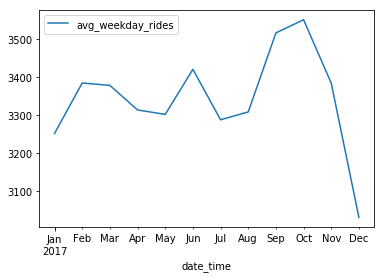

In [23]:
Berwyn_Rides.plot(x ='date_time', y='avg_weekday_rides')

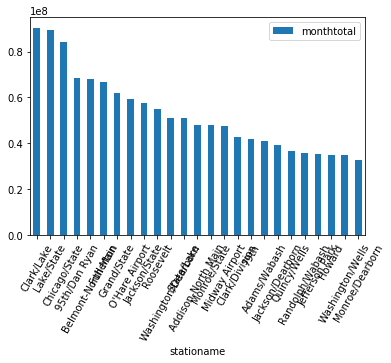

In [24]:
Station_Totals.head(25).plot(kind='bar',rot=60)

## What part of the city has the most train ridership?

Building a simple plot with Bokeh only requires a few lines of code. We will follow this step-wise process:

+ Import necessary modules
+ Create a Figure
+ Add Glyphs
+ Show / Export the plot

In [25]:
# 1. Import Modules
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

# 2. Create Figure
p = figure(plot_width = 600, plot_height = 400, title = 'Basic Plot')

# 3. Add Glyphs
x = [1, 2, 3, 4, 5]
y = [10, 20, 40, 80, 160]
p.circle(x, y, color = 'red', alpha = 0.5, size = 15)

# 4. Show the plot
output_notebook()
show(p)

Loading BokehJS ...

1. Import Modules: The show() and output_notebook() functions are what is used to display the graph in the Jupyter Notebook. If you instead wanted to generate a static HTML file (for creating standalone web applications), you would import and use the output_file() function. The figure() class is also imported and contains most of the defaults options for displaying objects.

2. Create Figure: To create a new plot, you instantiate a new figure() class. In laymen terms, you create a new figure object. You can pass parameters into this function to modify the default layout. For example, I set the plot height and width, as well as gave the plot a title.
3. Add Glyphs: The main point of visualizations are to display data. Ive created two lists of data (labelled x and y). While ive created python lists, you could use NumPy arrays or Pandas series as your input data. With the data, you can pass it to a render / Glyph function that will render the data. Here ive used the circle() Glyph. I could have used any other Glyph in this list if I wanted.
4. Show / Export: I can now call some functions to show the plot. I call output_notebook() to render the plot in the Jupyter Notebook. Then I call show() to actually render the plot.

In [26]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)
output_notebook()
show(p)

Loading BokehJS ...

In [27]:
# A function that takes string of lat/loncoordinates (like in the
#dataframe), and converts them to a tuple of X and Y coordinates.
import math
from ast import literal_eval
def merc(Coords):
    Coordinates = literal_eval(Coords)
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

In [30]:
L_Map = pd.read_csv('data/CTA_-_System_Information_-_List_of__L__Stops_-_Map.csv',sep=',')
L_Map.head()

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30161,18th (Loop-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30162,18th (54th/Cermak-bound),18th,40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,35th/Archer (Loop-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,35th/Archer (Midway-bound),35th/Archer,40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30213,35-Bronzeville-IIT (Harlem-bound),35th-Bronzeville-IIT,41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [31]:
L_Map['coords_x'] = L_Map['Location'].apply(lambda x: merc(x)[0])
L_Map['coords_y'] = L_Map['Location'].apply(lambda x: merc(x)[1])

In [32]:
L_Map[['Location', 'coords_x', 'coords_y']].head()

,Location,coords_x,coords_y
0,"(41.857908, -87.669147)",-9.759285e+06,5.139718e+06
1,"(41.857908, -87.669147)",-9.759285e+06,5.139718e+06
2,"(41.829353, -87.680622)",-9.760562e+06,5.135452e+06
3,"(41.829353, -87.680622)",-9.760562e+06,5.135452e+06
4,"(41.831677, -87.625826)",-9.754462e+06,5.135799e+06


In [33]:
L_Map.drop_duplicates(subset='MAP_ID', keep="last", inplace=True)

In [34]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)
p.circle(x = L_Map['coords_x'],
         y = L_Map['coords_y'])
output_notebook()
show(p)

Loading BokehJS ...

In [35]:
# 1. Group ridership totals
Station_Group = L_Rides.groupby(['station_id'])
Station_Totals = pd.DataFrame(Station_Group['monthtotal'].sum())

# 2. Merge dataframes
Merged = pd.merge(L_Map, Station_Totals, left_on='MAP_ID', right_index=True)

In [36]:
Merged[['coords_x', 'coords_y', 'monthtotal']].head()

,coords_x,coords_y,monthtotal
1,-9.759285e+06,5.139718e+06,8193564
3,-9.760562e+06,5.135452e+06,14609429
5,-9.754462e+06,5.135799e+06,11908073
7,-9.753705e+06,5.133526e+06,5420553
10,-9.753683e+06,5.132443e+06,7224545


In [37]:
# Scale the ridership data to the appropriate size circle.
# Chose 2000000 as the scaling factor as it doesn't make
# circles too huge/too small.
#A bit of trial and error helped me determine this number.
Merged['circle_sizes'] = Merged['monthtotal'] / 2000000

In [40]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
# range bounds supplied in web mercator coordinates
p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)
p.circle(x=Merged['coords_x'],
         y=Merged['coords_y'], 
         size=Merged['circle_sizes'],
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
    
output_notebook()
show(p)

Loading BokehJS ...

Looks great! But how do we know which station is which?

The solution is to customize the default tools. Bokeh has interactive tools that can be used to report information and to change plot parameters such as zoom level or ranges (as you can see on the panel to the right).

The tool that will help us out is called the Hover Tool. We can use this to overlay information about each station when a user hovers over a circle.

Setting up the hover tool requires two parts:

1. Create a ColumnDataSource object that will be the definitive source of the data for the plot. This object has other functions, but we can discuss that in another article

2. Create a the Hover Tool object and point it to the ColumnDataSource object

In [41]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import ColumnDataSource, HoverTool
source = ColumnDataSource(data=dict(
                        x=list(Merged['coords_x']), 
                        y=list(Merged['coords_y']),
                        ridership=list(Merged['monthtotal']),
                        sizes=list(Merged['circle_sizes']),
                        stationname=list(Merged['STATION_NAME'])))
hover = HoverTool(tooltips=[
    ("station", "@stationname"),
    ("ridership","@ridership")
    
])
# range bounds supplied in web mercator coordinates
p = figure(x_axis_type="mercator", 
           y_axis_type="mercator",
           tools=[hover, 'wheel_zoom','save'])
p.add_tile(CARTODBPOSITRON)
p.circle(x='x',
         y='y', 
         source=source,
         size='sizes',
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
    
output_notebook()
show(p)

Loading BokehJS ...